In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('train.csv')
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
df.tail()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies
24782,3,0,0,3,2,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...


In [4]:
df['class'].unique()

array([2, 1, 0])

In [5]:
df['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [7]:
df.describe()


,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


feature engineering
combine 
combine hatespeech and offensive = 1 to be negative
neither = 0 to be positive

In [8]:
print(df.isnull().sum())

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [10]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

In [11]:
X=df['tweet']
y= df['class']
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized,y,test_size=0.3,random_state=45)

In [12]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train) 

y_pred = rf.predict(X_test) 

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8599865501008742


In [13]:
from sklearn.metrics import classification_report
X = df['tweet']
y = df['class']

# Preprocess the text
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8890457938269114
              precision    recall  f1-score   support

           0       0.57      0.14      0.22       290
           1       0.90      0.97      0.94      3832
           2       0.84      0.79      0.81       835

    accuracy                           0.89      4957
   macro avg       0.77      0.63      0.66      4957
weighted avg       0.87      0.89      0.87      4957



In [14]:
x = df['tweet']
Y= df['class']
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(x)
dc= DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_vectorized,Y,test_size=0.3,random_state=45)
dc.fit(X_train, y_train)
y_pred = dc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
#print(classification_report(y_test, y_pred))

Accuracy: 0.8833893745796907


prediction before any cleaning is completed, moving on to some eda to see the relations

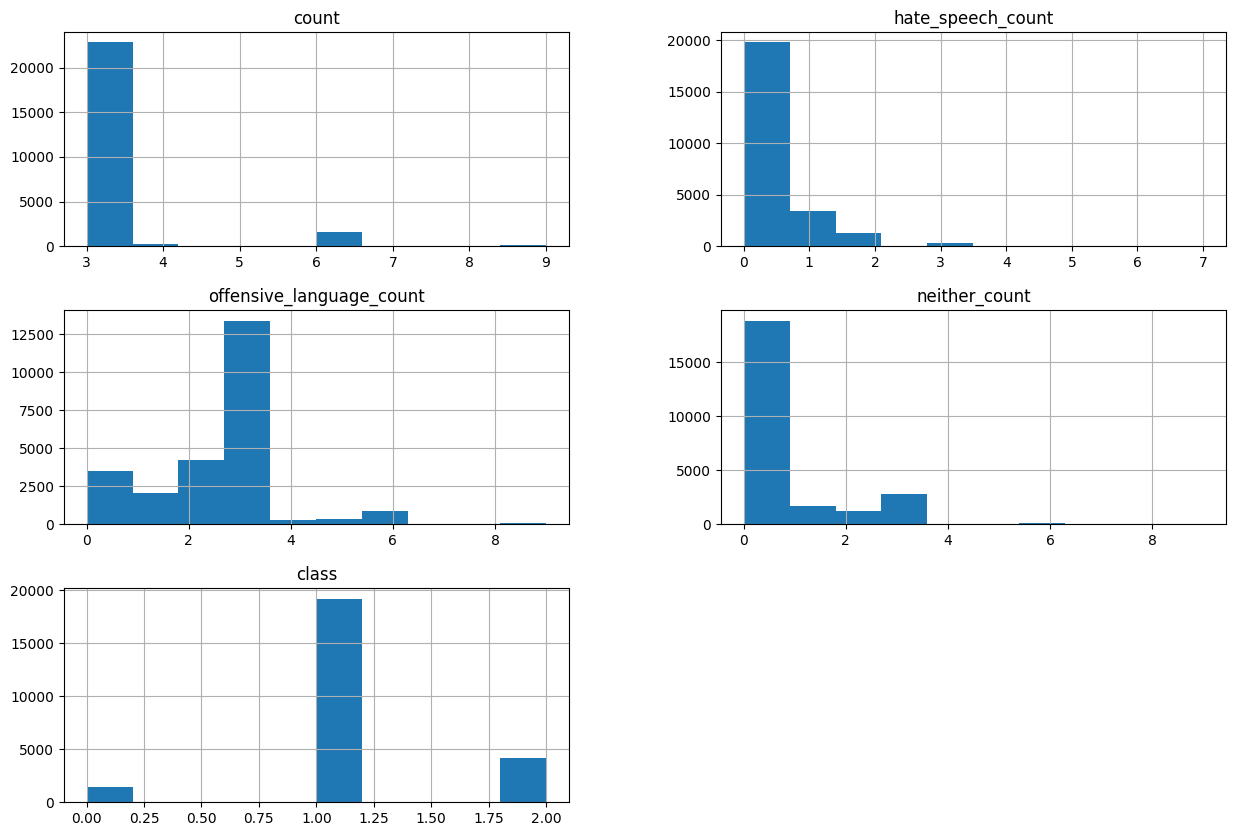

In [15]:
df.hist(bins=10, figsize=(15,10))
plt.show()

The graph clearly demonstrates that the majority of user-inputted words are neither offensive nor hateful. This is evident from the strong representation of Class 1, which highlights the predominance of non-offensive language.

Incidences on offensive language and hateful speech are relatively low 

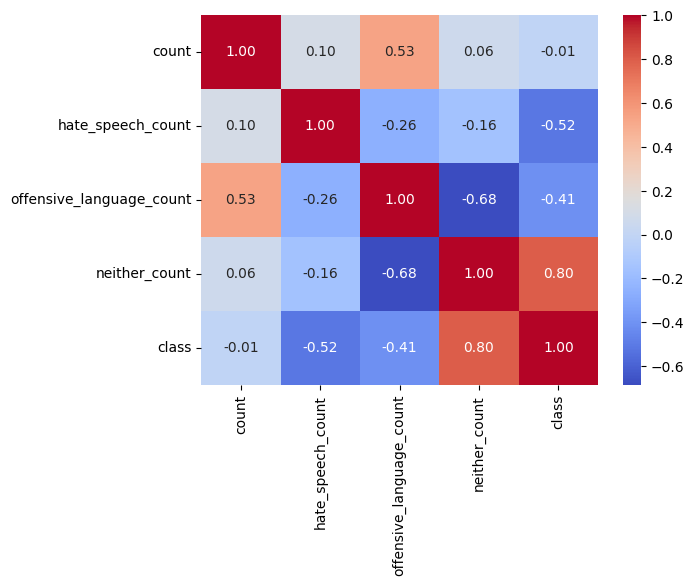

In [16]:
correlation_matrix=df.drop(columns=['tweet']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Although 53% of the total count appears to contain offensive language, there is an 80% likelihood that these instances ultimately ended up not classified as offensive or hate speech. This suggests a moderate correlation between the overall count and offensive language but a stronger tendency for words to fall into the "neither" category rather than being flagged as hate speech or offensive content.

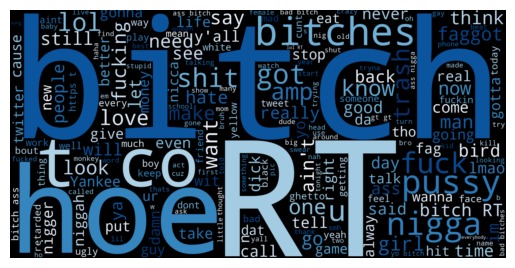

In [18]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000, height=1000, colormap="Blues").generate(" ".join(df['tweet']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This word cloud visualizes the most common offensive or negative words inputted by users, with the most frequently occurring words appearing largest and the least frequent ones appearing smallest. From this, we can infer that 'bitch' is the most frequently used word, followed by 'hoe' and 'pussy'. 'RT' although appears as the 2nd largest, it stands for 'retweet' which in this case is not an offensive or hateful word/speech 

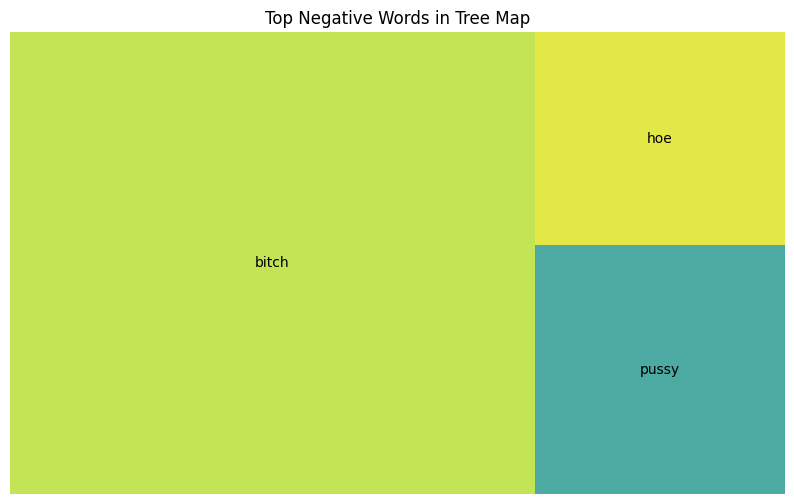

In [19]:
import squarify

# Sample data preparation
text_data = df['tweet'].str.cat(sep=' ')
words = text_data.lower().split()

# Count negative words (example list)
negative_words = ['bitch', 'hoe', 'pussy']
word_counts = {word: words.count(word) for word in negative_words if word in words}

# Sorting and preparing data for visualization
top_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:10])

# Create the Tree Map
plt.figure(figsize=(10, 6))
squarify.plot(sizes=top_words.values(), label=top_words.keys(), alpha=.8)
plt.title('Top Negative Words in Tree Map')
plt.axis('off')
plt.show()

The graph above showcases the top three most frequently occurring negative words found in tweets, providing insight into the most commonly used offensive language. These words stand out due to their high frequency, indicating recurring trends in user input.